# ADA (Advanced Data Analytics) - Assignment 1

    Aidan Kealey | 20151256

## Imports

In [60]:
import numpy as np
import pandas as pd
import os
import openpyxl
import csv
from tabulate import tabulate as tab
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import Ridge

## Q1
The following code block will:
1. Read each xlsx file in the project data folder
2. Combine it into one dataframe
3. And then save it to an csv file

Notes:
- I've noticed after looking at several of the excel files that the first 6 lines are repeats and can be discarded as they aren't needed for our analysis 

In [61]:
# Q1

csv_name = str(os.getcwd()) + '/a1_data.csv'

boroughs = ['bronx', 'brooklyn', 'manhattan', 'queens', 'staten_island']
years = ['2021', '2022', '2023']

df = pd.DataFrame()

for year in years:
    print(f'reading year: {year}')
    for borough in boroughs:
        print(f'reading borough: {borough}')
        read_file = str(os.getcwd()) + '/data/' + year + '_' + borough + '.xlsx'

        if year == '2021' and borough == 'bronx':
            df = pd.read_excel(read_file, engine='openpyxl', skiprows=[0, 1, 2, 3, 4, 5, 7])
            df.columns = [col.replace(" \n", " ") for col in df.columns]
            df.columns = [col.replace("\n", " ") for col in df.columns]
        else:
            if year == '2023':
                df_new = pd.read_excel(read_file, engine='openpyxl', skiprows=[0, 1, 2, 3])
            else:
                df_new = pd.read_excel(read_file, engine='openpyxl', skiprows=[0, 1, 2, 3, 4, 5, 7])
            
            df_new.columns = [col.replace(" \n", " ") for col in df_new.columns]
            df_new.columns = [col.replace("\n", " ") for col in df_new.columns]

            df = pd.concat([df, df_new])

    # print(tab(df, headers='keys', tablefmt='pretty', showindex=False))

print("writing dataframe to: " + csv_name)
df.to_csv(csv_name, index = False)
# df.describe(include="all")

reading year: 2021
reading borough: bronx
reading borough: brooklyn
reading borough: manhattan
reading borough: queens
reading borough: staten_island
reading year: 2022
reading borough: bronx
reading borough: brooklyn
reading borough: manhattan
reading borough: queens
reading borough: staten_island
reading year: 2023
reading borough: bronx
reading borough: brooklyn
reading borough: manhattan
reading borough: queens
reading borough: staten_island
writing dataframe to: /Users/aidankealey/Documents/fifth_year/CMPE_351/Assignment1/a1_data.csv


The following code block will read the data from the csv file created in the above code block, and read it into a dataframe to be used later on in question 1.

In [62]:
# Load the saved csv data into a dataframe 

csv_name = str(os.getcwd()) + '/a1_data.csv'

df = pd.DataFrame()

df = pd.read_csv(csv_name)

# convert the SALE DATE column from an object to date
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'])

### Q1.1
In the following code block, we will take the dataframe from the above code block and get some statistics on the housing prices for each borough.

In [63]:
# Q1.1

# manhattan = borough       1
# bronx = borough           2
# brooklyn = borough        3
# queens = borough          4
# staten_island = borough   5

ids = [[1, 'manhattan'], [2, 'bronx'], [3, 'brooklyn'], [4, 'queens'], [5, 'staten_island']]
years = [2021, 2022, 2023]
df_q1_1 = df

# filter for borough, sale price, and sale date
for borough in ids:
    b_id = borough[0]
    b_name = borough[1]
    print(f'Getting stats for {b_name}')
    df_borough = df_q1_1[df_q1_1['BOROUGH'] == b_id]

    df_price = df_borough[['BOROUGH', 'SALE PRICE', 'SALE DATE']]

    df_summary = df_price['SALE PRICE'].describe().apply("{0:.2f}".format)

    print(f'Stats: \n{df_summary}\n')

    print("Breaking down the stats for each year we get: \n")

    for year in years:
        df_year_summary = df_price[df_price['SALE DATE'].dt.year == year]
        describe_year_summary = df_year_summary['SALE PRICE'].describe().apply("{0:.2f}".format)
        print(f'Year: {str(year)}\nData:\n{describe_year_summary}\n')
    
    print("\n")


Getting stats for manhattan
Stats: 
count         60814.00
mean        3061197.25
std        17971986.89
min               0.00
25%          424800.00
50%          950000.00
75%         2175000.00
max      1033000000.00
Name: SALE PRICE, dtype: object

Breaking down the stats for each year we get: 

Year: 2021
Data:
count         22756.00
mean        3021416.52
std        15662001.97
min               0.00
25%          462000.00
50%          965000.00
75%         2137500.00
max      1033000000.00
Name: SALE PRICE, dtype: object

Year: 2022
Data:
count        21787.00
mean       3293708.61
std       22671373.85
min              0.00
25%         410000.00
50%         937500.00
75%        2200000.00
max      931000000.00
Name: SALE PRICE, dtype: object

Year: 2023
Data:
count        16271.00
mean       2805498.48
std       13258988.84
min              0.00
25%         365000.00
50%         930000.00
75%        2200000.00
max      598155755.00
Name: SALE PRICE, dtype: object



Getting sta

### Q1.2
In the following code block, we will take the data and get some statistics on the types of houses in the dataset.

count                      264350
unique                         44
top       01 ONE FAMILY DWELLINGS
freq                        56613
Name: BUILDING CLASS CATEGORY, dtype: object


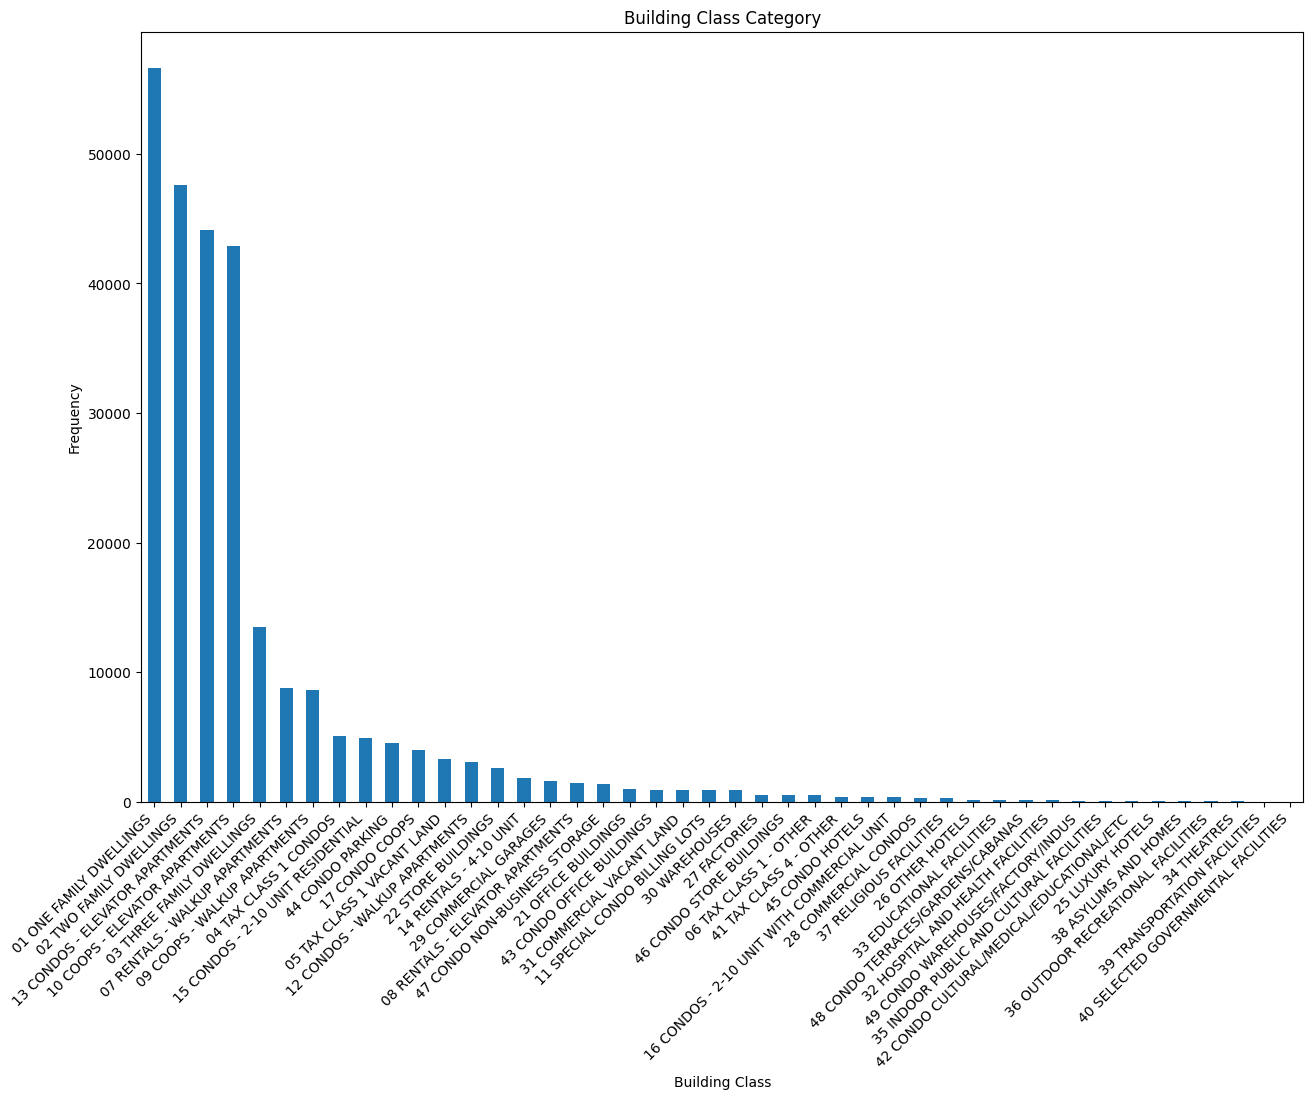

In [64]:
# Q1.2

df_q1_2 = df

df_house_types = df_q1_2
df_types_summary = df_house_types['BUILDING CLASS CATEGORY'].describe()
print(df_types_summary)

# plot the housing types
house_types = df_house_types['BUILDING CLASS CATEGORY'].value_counts()
house_types.plot(kind='bar', figsize=(15, 10))
plt.xlabel('Building Class')
plt.ylabel('Frequency')
plt.title('Building Class Category')
plt.xticks(rotation=45, ha='right')
plt.show()



### Q1.3
In the following code block, we will take the data and get some statistics on the missing values in the dataset.

In [65]:
# Q1.3

df_q1_3 = df

null_data = df_q1_3.isnull().values.sum()
print(f'Null data points count: {null_data}')
missing_data = df_q1_3.isna().sum()
print(f'\nMissing data in columns count:\n{missing_data}')
df_q1_3.describe(include="all")

Null data points count: 1224159

Missing data in columns count:
BOROUGH                                0
NEIGHBORHOOD                           0
BUILDING CLASS CATEGORY                0
TAX CLASS AT PRESENT                 347
BLOCK                                  0
LOT                                    0
EASE-MENT                         264350
BUILDING CLASS AT PRESENT            347
ADDRESS                                0
APARTMENT NUMBER                  198893
ZIP CODE                              17
RESIDENTIAL UNITS                  64181
COMMERCIAL UNITS                  113744
TOTAL UNITS                        55927
LAND SQUARE FEET                  121998
GROSS SQUARE FEET                 121998
YEAR BUILT                         18007
TAX CLASS AT TIME OF SALE              0
BUILDING CLASS AT TIME OF SALE         0
SALE PRICE                             0
SALE DATE                              0
EASEMENT                          264350
dtype: int64


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,EASEMENT
count,264350.000000,264350,264350,264003,264350.000000,264350.000000,0.0,264003,264350,65457,...,150606.000000,208423.000000,1.423520e+05,1.423520e+05,246343.000000,264350.000000,264350,2.643500e+05,264350,0.0
unique,NaN,255,44,10,NaN,NaN,NaN,176,247919,9213,...,NaN,NaN,NaN,NaN,NaN,NaN,177,NaN,NaN,NaN
top,NaN,FLUSHING-NORTH,01 ONE FAMILY DWELLINGS,1,NaN,NaN,NaN,R4,55 AUSTIN PLACE,3A,...,NaN,NaN,NaN,NaN,NaN,NaN,R4,NaN,NaN,NaN
freq,NaN,9136,56613,117717,NaN,NaN,NaN,44259,24,1025,...,NaN,NaN,NaN,NaN,NaN,NaN,44114,NaN,NaN,NaN
mean,2.961596,NaN,NaN,NaN,4136.043983,397.410785,NaN,NaN,NaN,NaN,...,0.341885,3.407628,5.978251e+03,6.100584e+03,1952.988374,1.649389,NaN,1.460313e+06,2022-05-24 04:29:47.375826944,NaN
min,1.000000,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000e+00,0.000000e+00,220.000000,1.000000,NaN,0.000000e+00,2021-01-01 00:00:00,NaN
25%,2.000000,NaN,NaN,NaN,1236.000000,22.000000,NaN,NaN,NaN,NaN,...,0.000000,1.000000,2.000000e+03,1.368000e+03,1925.000000,1.000000,NaN,0.000000e+00,2021-09-08 00:00:00,NaN
50%,3.000000,NaN,NaN,NaN,3188.500000,52.000000,NaN,NaN,NaN,NaN,...,0.000000,1.000000,2.500000e+03,1.962000e+03,1950.000000,2.000000,NaN,5.681840e+05,2022-05-03 00:00:00,NaN
75%,4.000000,NaN,NaN,NaN,6160.000000,1005.000000,NaN,NaN,NaN,NaN,...,0.000000,2.000000,4.000000e+03,2.816000e+03,1978.000000,2.000000,NaN,1.032975e+06,2023-02-01 00:00:00,NaN
max,5.000000,NaN,NaN,NaN,16350.000000,9114.000000,NaN,NaN,NaN,NaN,...,2261.000000,2261.000000,9.166500e+06,2.400000e+06,2023.000000,4.000000,NaN,1.033000e+09,2023-12-30 00:00:00,NaN


## Q2
### Proposed Questions
The two boroughs of interest are Manhattan & Queens. The analysis of the recovery of house price in the two boroughs are as follows:
1. Will the average price for a house in New York City increase from 2021 - 2023?
2. Will the price for a house in each borough change at a similar rate between 2021 and 2023?  

### Motivation 
The first question, is in regards to weather New York City (more specifically the boroughs we'll be looking at) has seen the average price of houses for sale increase in cost. If there is no increase then we can determine the housing market isn't doing too well as typically the price for housing usually goes up or other exploration into why this is the case maybe be required.

The second question, is in regards to weather the price in the broughs change at similar rates. This will allow us to determine if the different boroughs will be experiencing similar market trends or will we see on borough doinng better than the other.

### Hypothesis Test
For Q1:  
&emsp; H0 - The average price in New York city will remain constant between 2021 and 2023.  
&emsp; H1 - The price for a house in New York city will increase from 2021 to 2023.  

For Q2:  
&emsp; H0 - The rate at which the price for a house in each borough is sold for will change at seperate rates between 2021 and 2023.  
&emsp; H1 - The rate at which the price for a house in each borough is sold for will change at a similar rate in a post Covid-19 market. 

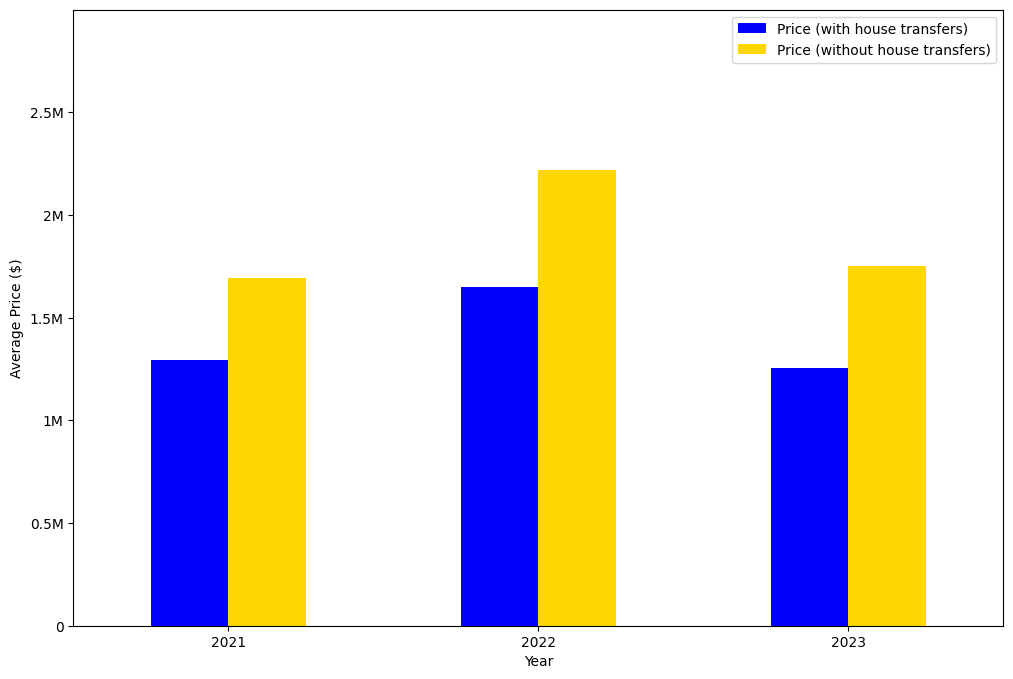

[1292809.81, 1650790.41, 1255067.69]
[1695382.25, 2219517.76, 1752560.67]


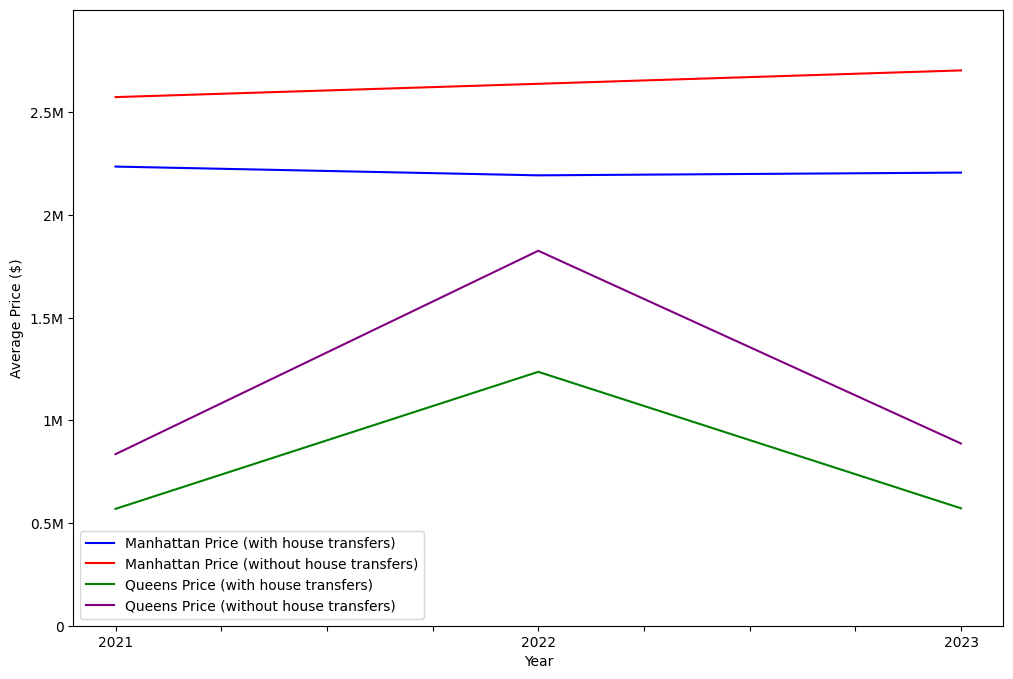

[2236035.4, 2193447.7, 2206779.78]
[2574478.18, 2639269.3, 2704456.14]
[569199.86, 1236448.26, 571903.84]
[835541.6, 1826126.85, 887412.86]


In [66]:
# Q2.1

df_q2_1 = df

years = [2021, 2022, 2023]
borough_of_interest = [1, 4]
tax_class_of_interest = ['1', '2']
average_price_with_transfers = []
average_price_without_transfers = []
manhattan_average_price_with_transfers = []
queens_average_price_with_transfers = []
manhattan_average_price_without_transfers = []
queens_average_price_without_transfers = []

df_boroughs = df_q2_1[df_q2_1['BOROUGH'].isin(borough_of_interest)]

df_boroughs = df_boroughs[df_boroughs['TAX CLASS AT PRESENT'].isin(tax_class_of_interest)]
df_boroughs = df_boroughs[['BOROUGH', 'SALE PRICE', 'SALE DATE']]
df_boroughs_without_transfers = df_boroughs[df_boroughs['SALE PRICE'] > 1]

# with housing transfers (sale price of 0)
for year in years:
    df_year_average = df_boroughs[df_boroughs['SALE DATE'].dt.year == year]
    value = df_year_average['SALE PRICE'].mean()
    average_price_with_transfers.append(round(value,2))


# without housing transfers (sale price of 0)
for year in years:
    df_year_average = df_boroughs_without_transfers[df_boroughs_without_transfers['SALE DATE'].dt.year == year]
    value = df_year_average['SALE PRICE'].mean()
    average_price_without_transfers.append(round(value,2))
    

both_averages = {'Price (with house transfers)': average_price_with_transfers,
                'Price (without house transfers)': average_price_without_transfers
                }

df_both_averages = pd.DataFrame(both_averages, columns=['Price (with house transfers)', 
                                                        'Price (without house transfers)'], index = years)

df_both_averages.plot.bar(figsize=(12, 8), color=['blue', 'gold'])
plt.ylim(0, 3000000)
plt.yticks(np.arange(0, 3000000, step=500000), labels=['0', '0.5M', '1M', '1.5M', '2M', '2.5M'])
plt.xlabel('Year')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=0)
plt.show()

print(average_price_with_transfers)
print(average_price_without_transfers)


# with housing transfers (sale price of 0)
for year in years:
    df_year_average = df_boroughs[df_boroughs['SALE DATE'].dt.year == year]
    df_manhattan_year_average = df_year_average[df_year_average['BOROUGH'].isin([1])]
    value = df_manhattan_year_average['SALE PRICE'].mean()
    manhattan_average_price_with_transfers.append(round(value,2))

    df_queens_year_average = df_year_average[df_year_average['BOROUGH'].isin([4])]
    value = df_queens_year_average['SALE PRICE'].mean()
    queens_average_price_with_transfers.append(round(value,2))


# without housing transfers (sale price of 0)
for year in years:
    df_year_average = df_boroughs_without_transfers[df_boroughs_without_transfers['SALE DATE'].dt.year == year]
    df_manhattan_year_average = df_year_average[df_year_average['BOROUGH'].isin([1])]
    value = df_manhattan_year_average['SALE PRICE'].mean()
    manhattan_average_price_without_transfers.append(round(value,2))

    df_queens_year_average = df_year_average[df_year_average['BOROUGH'].isin([4])]
    value = df_queens_year_average['SALE PRICE'].mean()
    queens_average_price_without_transfers.append(round(value,2))



averages = {'Manhattan Price (with house transfers)': manhattan_average_price_with_transfers,
            'Manhattan Price (without house transfers)': manhattan_average_price_without_transfers,
            'Queens Price (with house transfers)': queens_average_price_with_transfers,
            'Queens Price (without house transfers)': queens_average_price_without_transfers
            }

df_averages = pd.DataFrame(averages, columns=['Manhattan Price (with house transfers)', 
                                              'Manhattan Price (without house transfers)',
                                              'Queens Price (with house transfers)',
                                              'Queens Price (without house transfers)'], index = ['2021', '2022', '2023'])

df_averages.plot(figsize=(12, 8), color=['blue', 'red', 'green', 'purple'])
plt.ylim(0, 3000000)
plt.yticks(np.arange(0, 3000000, step=500000), labels=['0', '0.5M', '1M', '1.5M', '2M', '2.5M'])
plt.xlabel('Year')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=0)
plt.show()

print(manhattan_average_price_with_transfers)
print(manhattan_average_price_without_transfers)
print(queens_average_price_with_transfers)
print(queens_average_price_without_transfers)




The results show H0 is correct: The average price in New York city will remain constant between 2021 and 2023.

[-0.019046075925273742, 0.006078138995518234]
[0.025166699995103237, 0.024698820995644688]
[1.1722567886787605, -0.5374623763067935]
[1.1855606590982424, -0.5140464311118366]


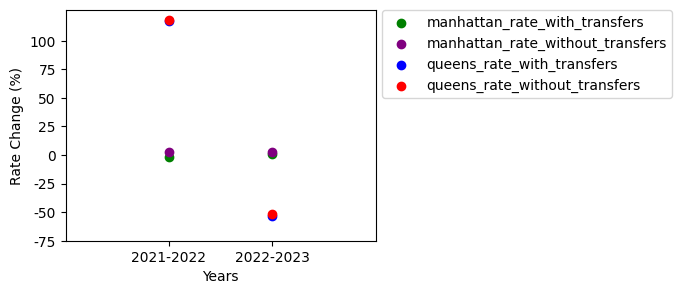

In [67]:
# Q2.2

df_q2_1 = df

borough_of_interest = [1, 4]
tax_class_of_interest = ['1', '2']
manhattan_rate_with_transfers = []
manhattan_rate_without_transfers = []
queens_rate_with_transfers = []
queens_rate_without_transfers = []

df_boroughs = df_q2_1[df_q2_1['BOROUGH'].isin(borough_of_interest)]

df_boroughs = df_boroughs[df_boroughs['TAX CLASS AT PRESENT'].isin(tax_class_of_interest)]
df_manhattan = df_boroughs[df_boroughs['BOROUGH'].isin([1])]
df_queens = df_boroughs[df_boroughs['BOROUGH'].isin([4])]
df_manhattan = df_manhattan[['SALE PRICE', 'SALE DATE']]
df_queens = df_queens[['SALE PRICE', 'SALE DATE']]

df_manhattan_without_transfers = df_manhattan[df_manhattan['SALE PRICE'] > 1]
df_queens_without_transfers = df_queens[df_queens['SALE PRICE'] > 1]


def calculate_rate_change(pre, curr):
    rate = (curr / pre) - 1
    return rate


def process(df):
    years = [2021, 2022, 2023]
    temp = []
    arr = []
    for year in years:
        df_rate = df[df['SALE DATE'].dt.year == year]
        value = df_rate['SALE PRICE'].mean()
        temp.append(round(value,2))

    arr.append(calculate_rate_change(temp[0], temp[1]))
    arr.append(calculate_rate_change(temp[1], temp[2]))
    
    return arr


manhattan_rate_with_transfers = process(df_manhattan)
manhattan_rate_without_transfers = process(df_manhattan_without_transfers)
queens_rate_with_transfers = process(df_queens)
queens_rate_without_transfers = process(df_queens_without_transfers)
    

print(manhattan_rate_with_transfers)
print(manhattan_rate_without_transfers)
print(queens_rate_with_transfers)
print(queens_rate_without_transfers)

plt.figure(figsize=(4, 3))
date = ['2021-2022', '2022-2023']
plt.scatter(x=date, y=manhattan_rate_with_transfers, color='green')
plt.scatter(x=date, y=manhattan_rate_without_transfers, color='purple')
plt.scatter(x=date, y=queens_rate_with_transfers, color='blue')
plt.scatter(x=date, y=queens_rate_without_transfers, color='red')
plt.legend(['manhattan_rate_with_transfers', 
            'manhattan_rate_without_transfers',
            'queens_rate_with_transfers',
            'queens_rate_without_transfers'],
            bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.margins(x=1)
plt.yticks(np.arange(-0.75, 1.25, step=.25), labels=['-75', '-50', '-25', '0', '25', '50', '75', '100'])
plt.xlabel('Years')
plt.ylabel('Rate Change (%)')
plt.show()


The results show that H0 is correct: The rate at which the price for a house in each borough is sold for will change at seperate rates between 2021 and 2023.

## Q3
Building class categories to compare house prices and house sales: 
- One Family Dwelling
- Two Family Dwelling
- Condos - Elevator Apartment

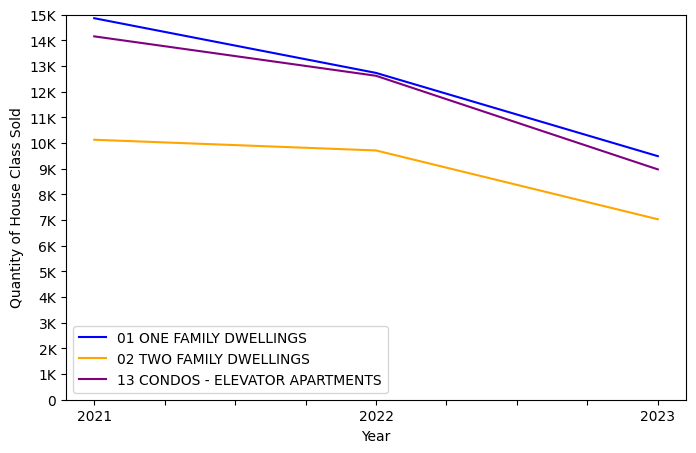

[14864, 12733, 9490]
[10129, 9712, 7031]
[14157, 12621, 8974]


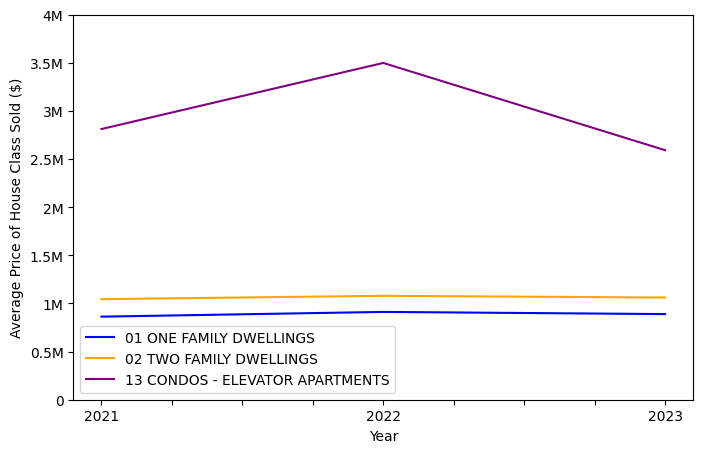

[862971.29, 912278.3, 889715.98]
[1044789.67, 1079712.14, 1061623.33]
[2812276.9, 3499020.32, 2592544.29]


In [68]:
# Q3

df_q3 = df

class_categories = ['01 ONE FAMILY DWELLINGS', '02 TWO FAMILY DWELLINGS', '13 CONDOS - ELEVATOR APARTMENTS']

df_buildings = df_q3[df_q3['BUILDING CLASS CATEGORY'].isin(class_categories)]

# filter out data for only houses sold and not transfered
df_buildings = df_buildings[df_buildings['SALE PRICE'] > 1]

df_one_dwelling = df_buildings[df_buildings['BUILDING CLASS CATEGORY'].isin(['01 ONE FAMILY DWELLINGS'])]
df_two_dwelling = df_buildings[df_buildings['BUILDING CLASS CATEGORY'].isin(['02 TWO FAMILY DWELLINGS'])]
df_condos = df_buildings[df_buildings['BUILDING CLASS CATEGORY'].isin(['13 CONDOS - ELEVATOR APARTMENTS'])]

df_one_dwelling = df_one_dwelling[['SALE PRICE', 'SALE DATE']]
df_two_dwelling = df_two_dwelling[['SALE PRICE', 'SALE DATE']]
df_condos = df_condos[['SALE PRICE', 'SALE DATE']]


def calculate_quantity(df):
    years = [2021, 2022, 2023]
    arr = []
    for year in years:
        df_quant = df[df['SALE DATE'].dt.year == year]
        value = len(df_quant.index)
        arr.append(round(value,2))
    
    return arr


def calculate_average(df):
    years = [2021, 2022, 2023]
    arr = []
    for year in years:
        df_average = df[df['SALE DATE'].dt.year == year]
        value = df_average['SALE PRICE'].mean()
        arr.append(round(value,2))
    
    return arr


quant_od = calculate_quantity(df_one_dwelling)
quant_td = calculate_quantity(df_two_dwelling)
quant_c = calculate_quantity(df_condos)

average_od = calculate_average(df_one_dwelling)
average_td = calculate_average(df_two_dwelling)
average_c = calculate_average(df_condos)

quant = {'01 ONE FAMILY DWELLINGS': quant_od,
         '02 TWO FAMILY DWELLINGS': quant_td,
         '13 CONDOS - ELEVATOR APARTMENTS': quant_c
         }

df_quant = pd.DataFrame(quant, columns=['01 ONE FAMILY DWELLINGS', 
                                        '02 TWO FAMILY DWELLINGS',
                                        '13 CONDOS - ELEVATOR APARTMENTS'], index = ['2021', '2022', '2023'])

df_quant.plot(figsize=(8, 5), color=['blue', 'orange', 'purple'])
plt.ylim(0, 15000)
plt.yticks(np.arange(0, 16000, step=1000), labels=['0', '1K', '2K', '3K', '4K', '5K', '6K', '7K', '8K', '9K', '10K', '11K', '12K', '13K', '14K', '15K'])
plt.xlabel('Year')
plt.ylabel('Quantity of House Class Sold')
plt.xticks(rotation=0)
plt.show()

print(quant_od)
print(quant_td)
print(quant_c)

average = {'01 ONE FAMILY DWELLINGS': average_od,
         '02 TWO FAMILY DWELLINGS': average_td,
         '13 CONDOS - ELEVATOR APARTMENTS': average_c
         }

df_average = pd.DataFrame(average, columns=['01 ONE FAMILY DWELLINGS', 
                                        '02 TWO FAMILY DWELLINGS',
                                        '13 CONDOS - ELEVATOR APARTMENTS'], index = ['2021', '2022', '2023'])

df_average.plot(figsize=(8, 5), color=['blue', 'orange', 'purple'])
plt.ylim(0, 4000000)
plt.yticks(np.arange(0, 4500000, step=500000), labels=['0', '0.5M', '1M', '1.5M', '2M', '2.5M', '3M', '3.5M', '4M'])
plt.xlabel('Year')
plt.ylabel('Average Price of House Class Sold ($)')
plt.xticks(rotation=0)
plt.show()

print(average_od)
print(average_td)
print(average_c)


### Findings

The data shows the quantity of the three building class catergories selected have declined over the three years (refer to the first graph above). In the second graph we can see that the average prices for these building types between 2021 and 2023 have remained fairly flat. Please note, the execption of building class category 13 CONDOS - ELEVATOR APARTMENTS, where its averge price did increase from 2021 to 2022 but then decreased back to a similar average price point in 2023 as it was in 2021. This data indicated that even though the quantity of these types of houses sold has declined, the average price for one of these houses have not seen an increase but remains level. 

## Q4

Features of Interest:  
- BOROUGH  
    - Each borough in New York City is unique, some boroughs will have more apartment style homes where some will have more single house dwellings. Therefore, including this feature will allow a model to have a better understand of the typical price of a place within the city.
- NEIGHBORHOOD
    - Including the Neighbourhood will allow a model to make a better price prediction. Not all neighborhoods wintin a borough are desirable and sought after. Therefore, each neighborhood will have different price ranges for the buildings within them.
- BUILDING CLASS CATEGORY
    - Building class catergory is imporant to include. This is because the prices for certain class types will be more desirable. For example, an apartment style house will probably be less desirable in a borough outside of manhatten, therefore this value can help influence the prediction.
- TAX CLASS AT PRESENT
    - This catergory is important to include as well. Offices and factories do not get priced the same as residental properities (typically), therefore the tax class is important to include as it will have an influence on the sale price.
- TOTAL UNITS
    - The more units sold at a time will probably increase the cost.
- LAND SQUARE FEET
    - The land area will influence the price of the property as it is the physical $/ft^2 land people are buying.
- GROSS SQUARE FEET
    - This is important as it covers the total area of all floors of a building. This means a place might have a certain land square feet but its gross is doubled due to the place having 2 stories. Therefore, typically when buying a property the size of the actual place will influence the total cost of the sale.
- YEAR BUILT
    - Usually older homes come with the need to fix more things. Therefore, the older the year built the more likely the place will need fixing and the cheaper it will be.
- SALE DATE
    - The sale date can influence the price a building is sold for. Typically new jobs start in waves (January, May, September), therefore, with more people moving into the city at these times, the housing prices can see an increase in cost.

Note, I will also be filtering out houses that have been transferred or inherited. 


/var/folders/yc/z5nb9w3s5_51k4zty9gsbrvm0000gn/T/ipykernel_21877/1964278693.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['NEIGHBORHOOD'] = df_raw['NEIGHBORHOOD'].map(neighborhood_mapping)
/var/folders/yc/z5nb9w3s5_51k4zty9gsbrvm0000gn/T/ipykernel_21877/1964278693.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['BUILDING CLASS CATEGORY'] = df_raw['BUILDING CLASS CATEGORY'].map(bcc_mapping)
/var/folders/yc/z5nb9w3s5_51k4zty9gsbrvm0000gn/T/ipykernel_21877/1964278693.py:17: SettingWith

<Axes: >

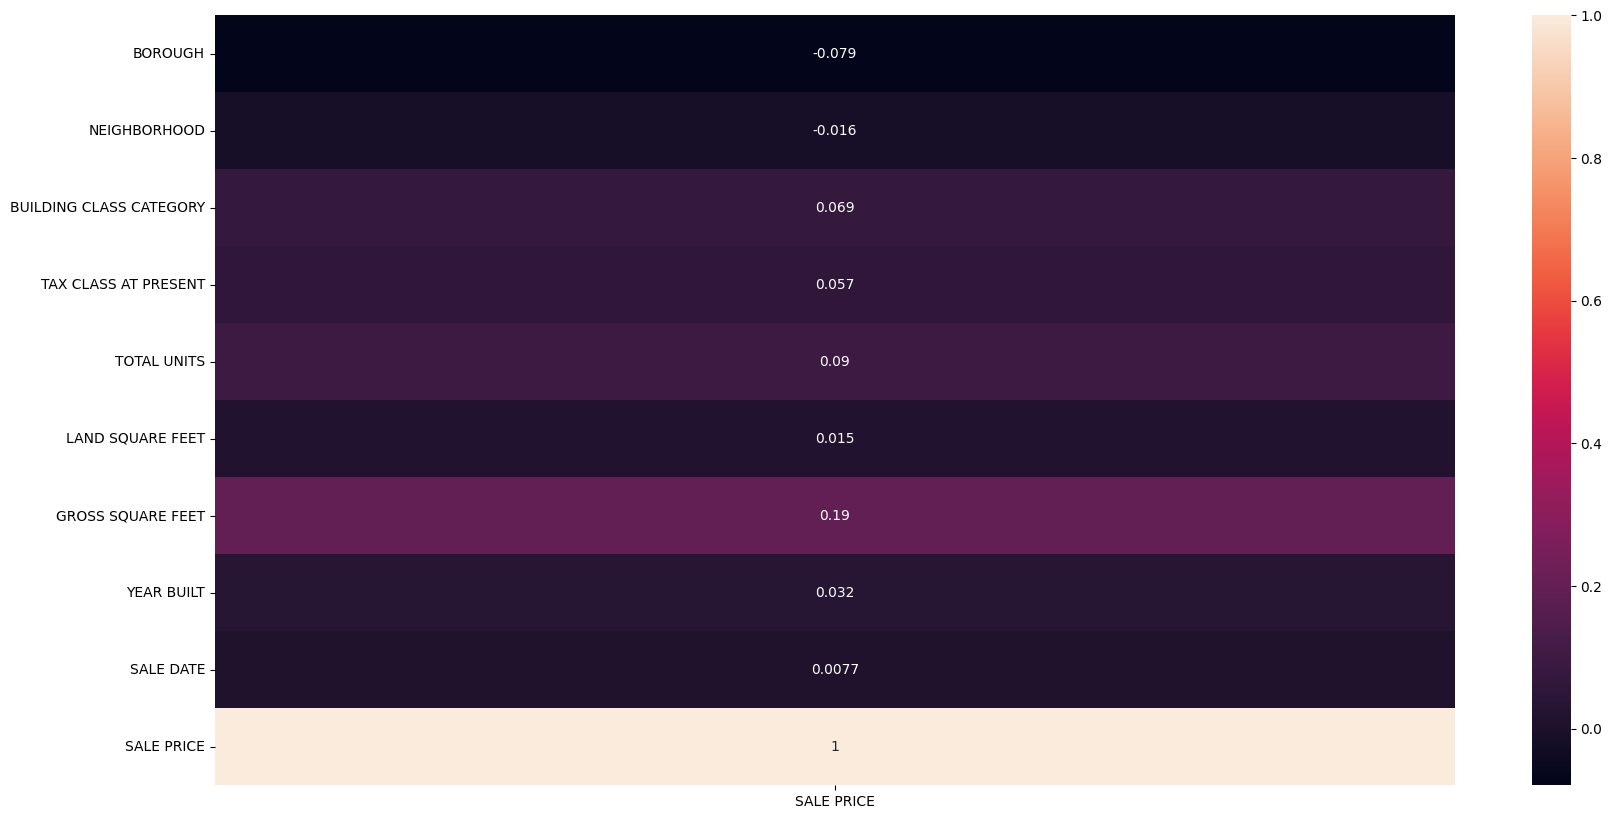

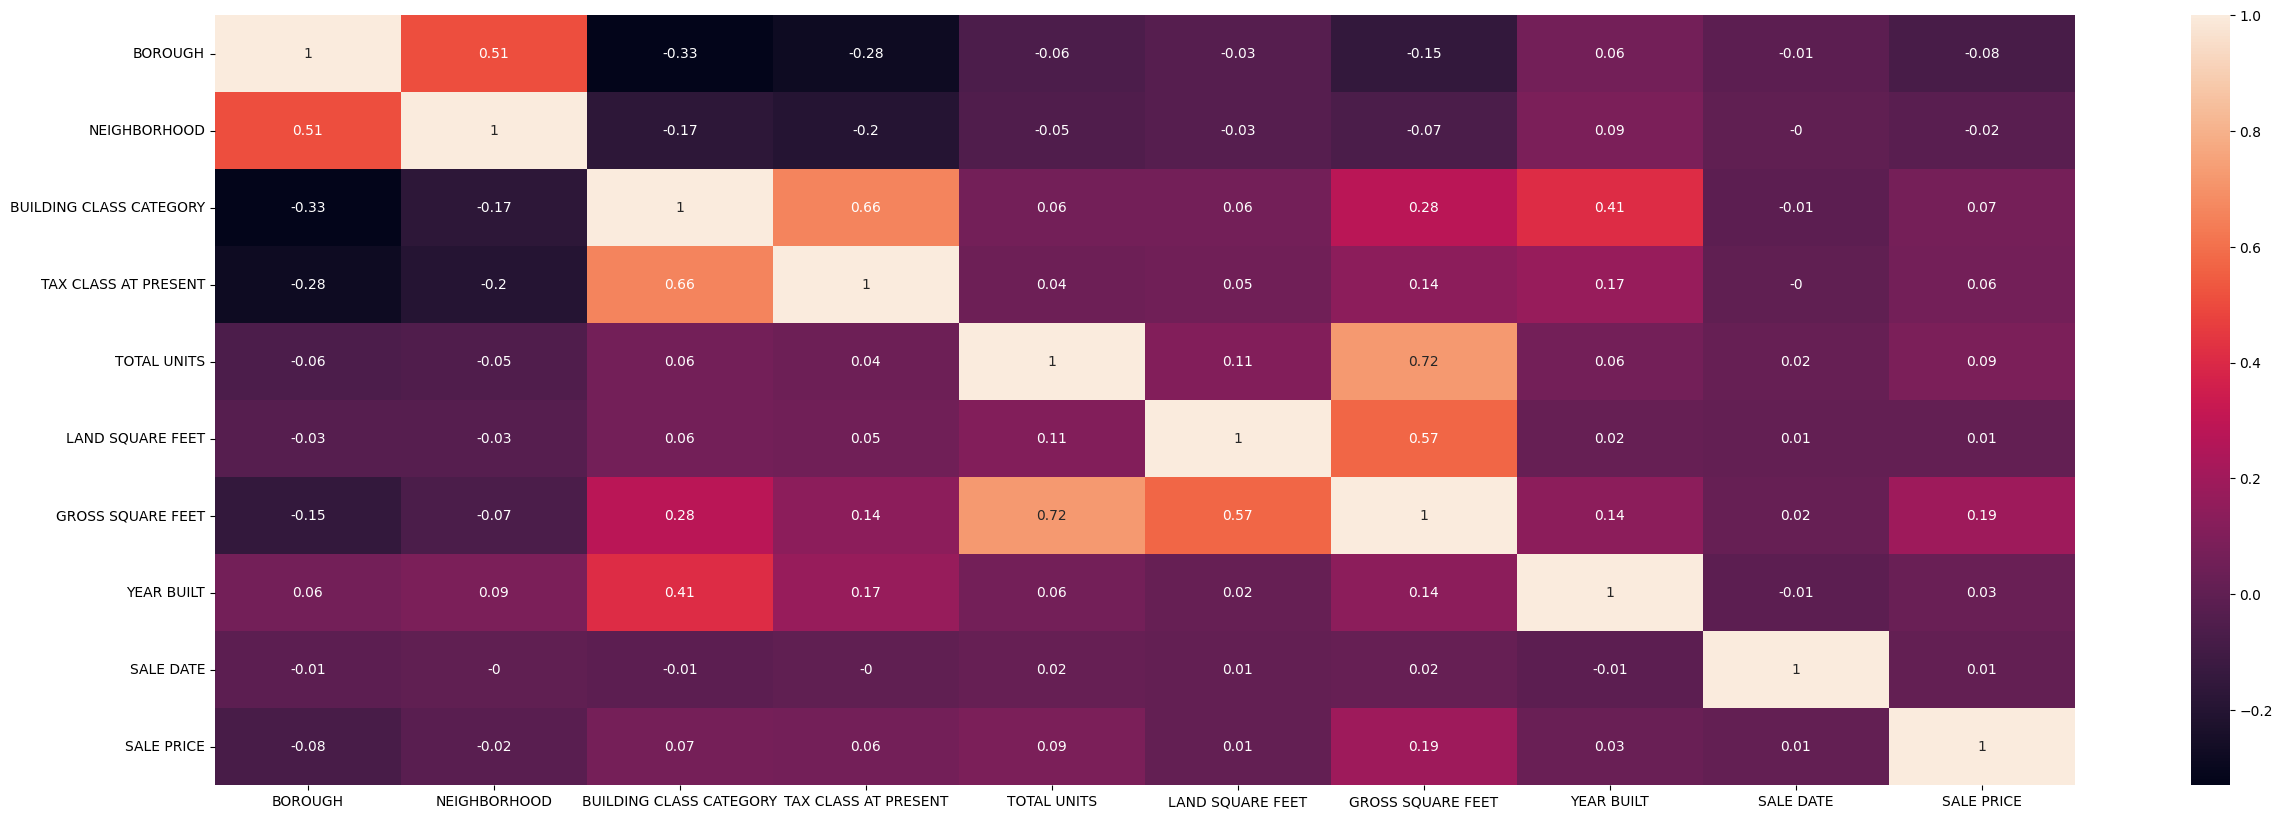

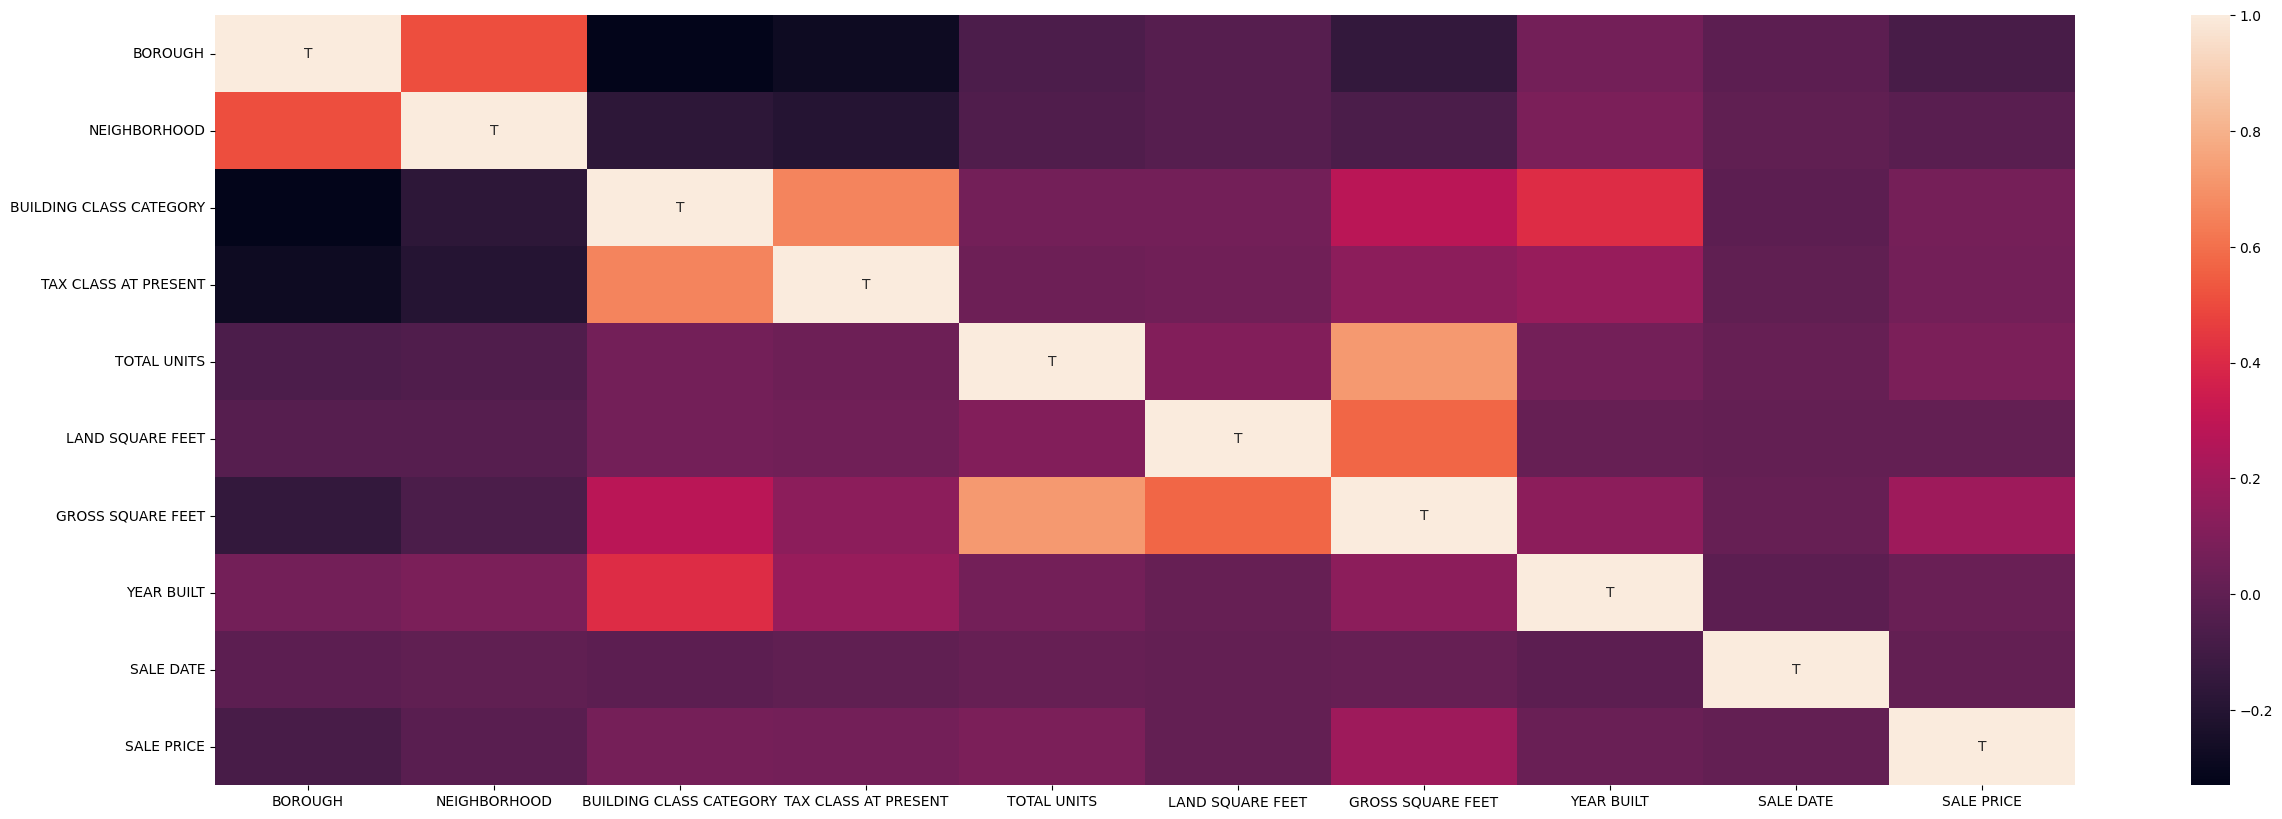

In [69]:
# Q4

df_q4 = df

df_raw = df_q4[['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT', 'SALE DATE', 'SALE PRICE']]

unique_neighborhoods = df_raw['NEIGHBORHOOD'].unique()
neighborhood_mapping = {neighborhood: i + 1 for i, neighborhood in enumerate(unique_neighborhoods)}
df_raw['NEIGHBORHOOD'] = df_raw['NEIGHBORHOOD'].map(neighborhood_mapping)

unique_bcc = df_raw['BUILDING CLASS CATEGORY'].unique()
bcc_mapping = {bcc: i + 1 for i, bcc in enumerate(unique_bcc)}
df_raw['BUILDING CLASS CATEGORY'] = df_raw['BUILDING CLASS CATEGORY'].map(bcc_mapping)

unique_tcap = df_raw['TAX CLASS AT PRESENT'].unique()
tcap_mapping = {tcap: i + 1 for i, tcap in enumerate(unique_tcap)}
df_raw['TAX CLASS AT PRESENT'] = df_raw['TAX CLASS AT PRESENT'].map(tcap_mapping)

# filter out data for only houses sold and not transfered
df_raw = df_raw[df_raw['SALE PRICE'] > 1]

# Plotting taken from tutorial:
fig, ax = plt.subplots(figsize=(20, 10))
corr = df_raw.corr()[['SALE PRICE']]
sns.heatmap(corr, annot=True)

fig, ax = plt.subplots(figsize=(30, 10))
cor_df = df_raw.corr(method = "pearson").round(2)
sns.heatmap(cor_df, ax=ax, annot=True)

annot_labels = np.empty_like(cor_df, dtype=str)
annot_mask = cor_df >= 0.8
annot_labels[annot_mask] = 'T' 

fig, ax = plt.subplots(figsize=(30, 10))
sns.heatmap(cor_df, annot=annot_labels, fmt='')

## Q5

Raw Features to use:
- NEIGHBORHOOD
- BUILDING CLASS CATEGORY
- TOTAL UNITS
- GROSS SQUARE FEET
- YEAR BUILT
- and the filter of houses that have not been transferred or inherited.

Please note, since the correlation values shown in heat map are much less than 0.9 we can say the features selected show no multicollinearity and move forward with engineering some features.

### Feature Engineering 
- GROSS SQUARE FEET PER UNIT
    - GROSS SQUARE FEET / TOTAL UNITS, this gives a more accurate size per unit.
- SALE PRICE PER UNIT
    - SALE PRICE / TOTAL UNITs, this give a more accurate price per unit.




/var/folders/yc/z5nb9w3s5_51k4zty9gsbrvm0000gn/T/ipykernel_21877/4159730051.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw_q5['NEIGHBORHOOD'] = df_raw_q5['NEIGHBORHOOD'].map(neighborhood_mapping)
/var/folders/yc/z5nb9w3s5_51k4zty9gsbrvm0000gn/T/ipykernel_21877/4159730051.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw_q5['BUILDING CLASS CATEGORY'] = df_raw_q5['BUILDING CLASS CATEGORY'].map(bcc_mapping)


<Axes: >

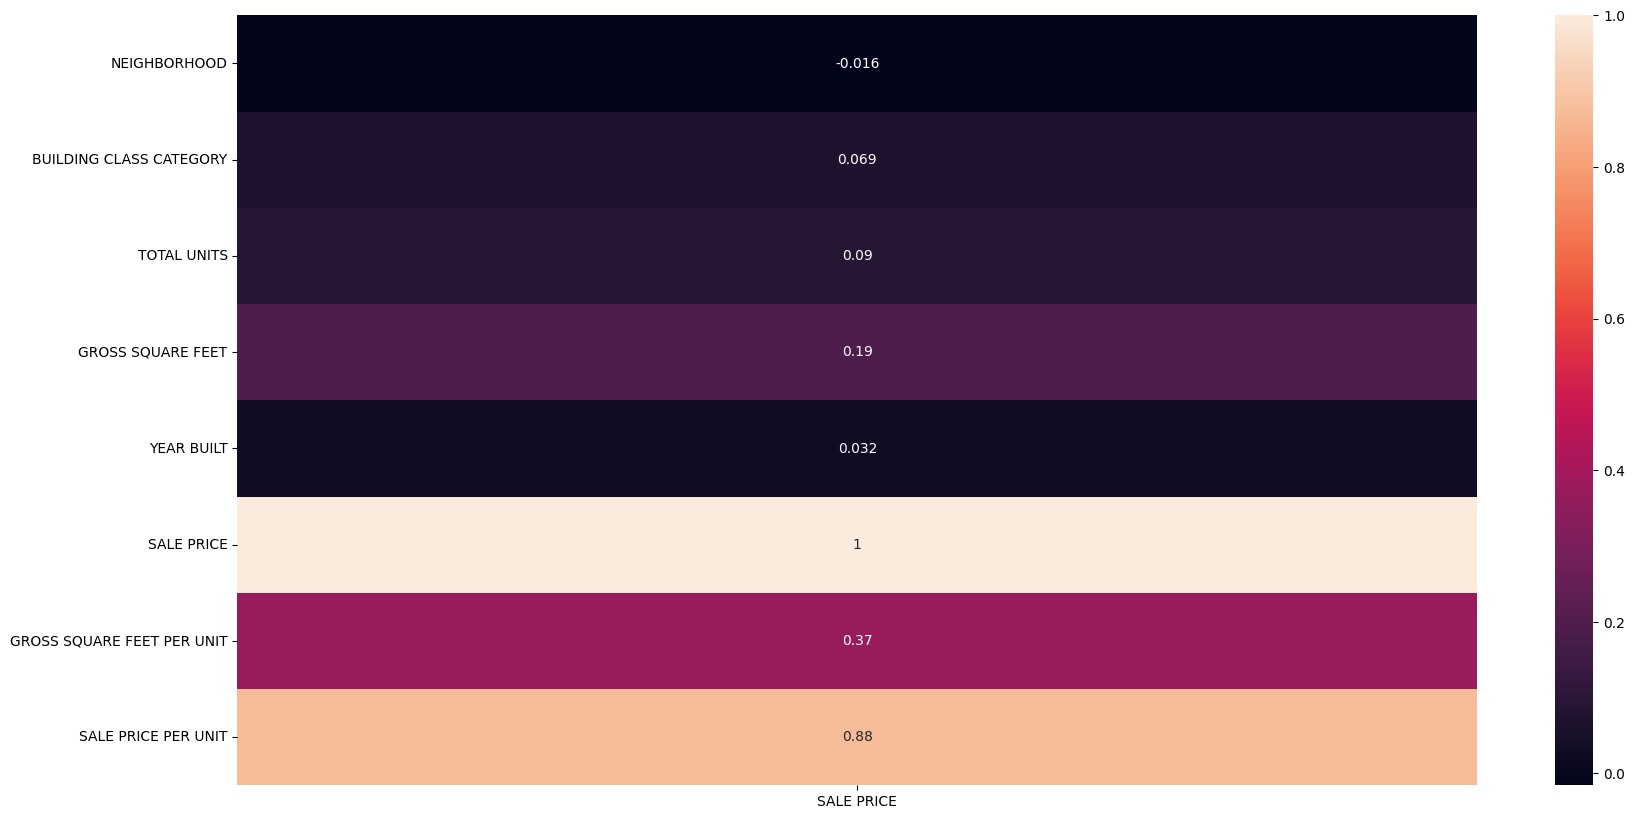

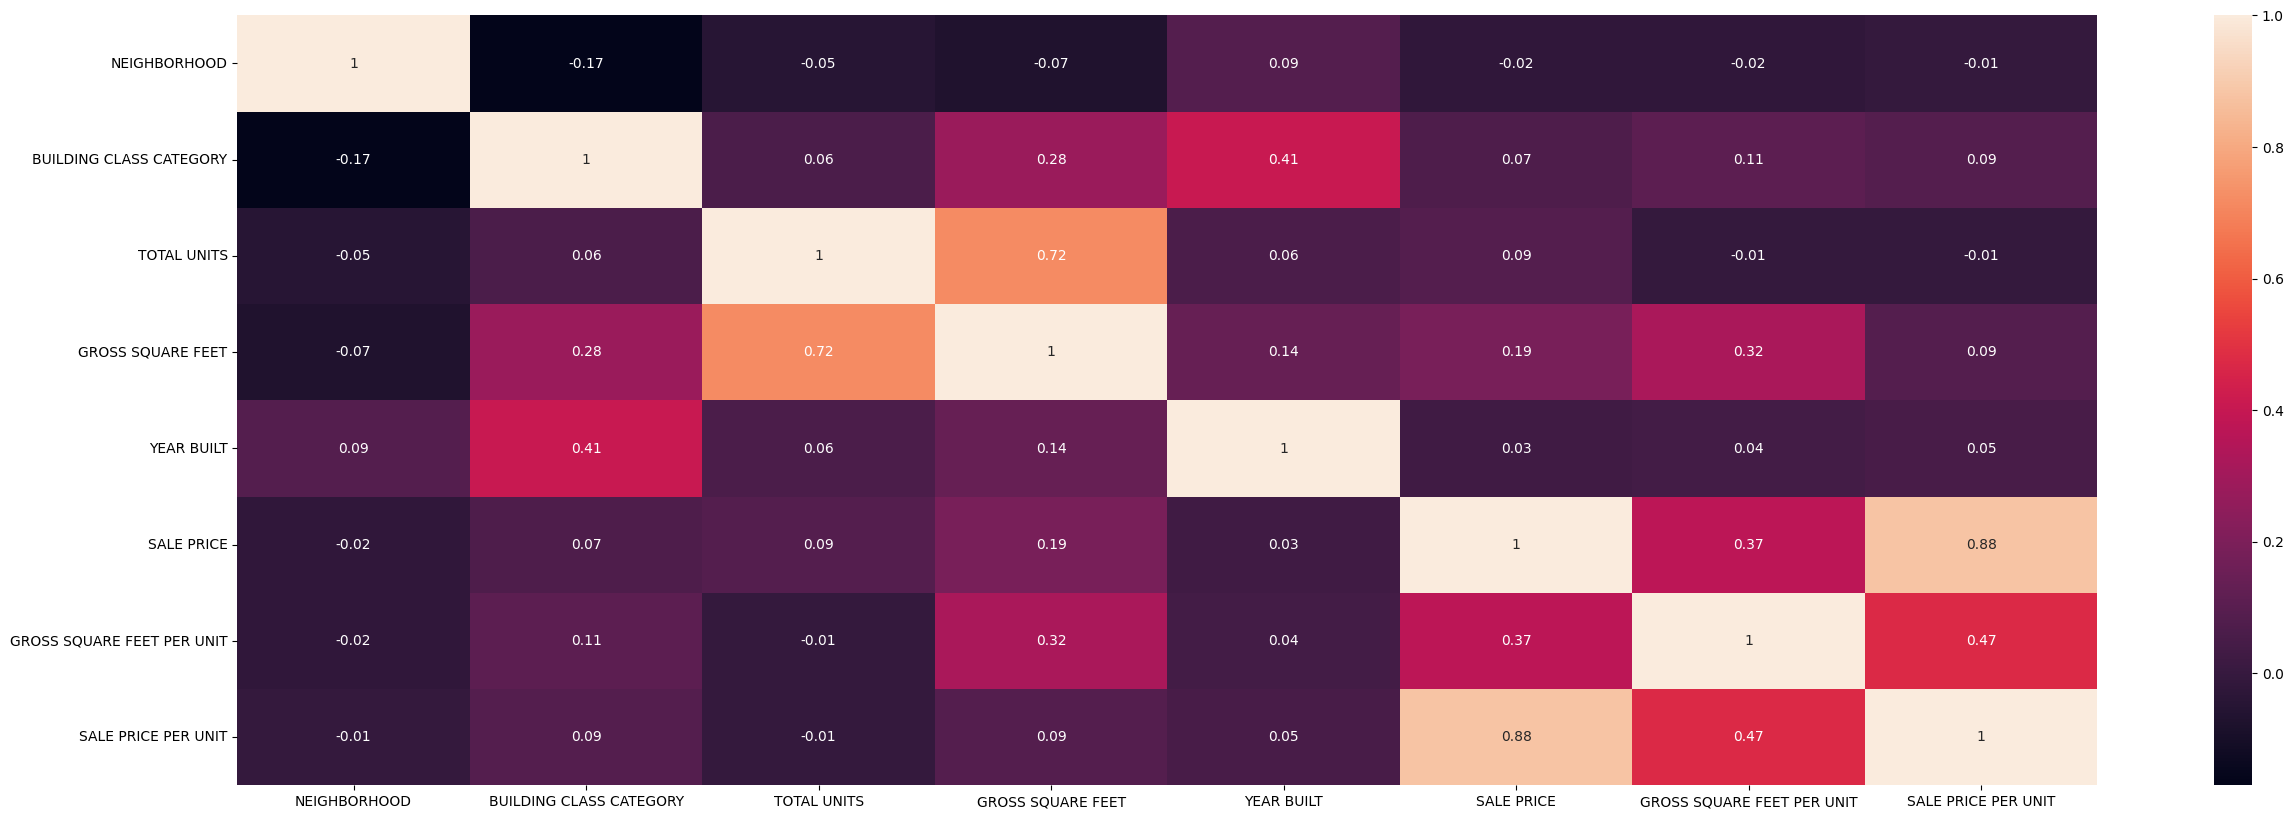

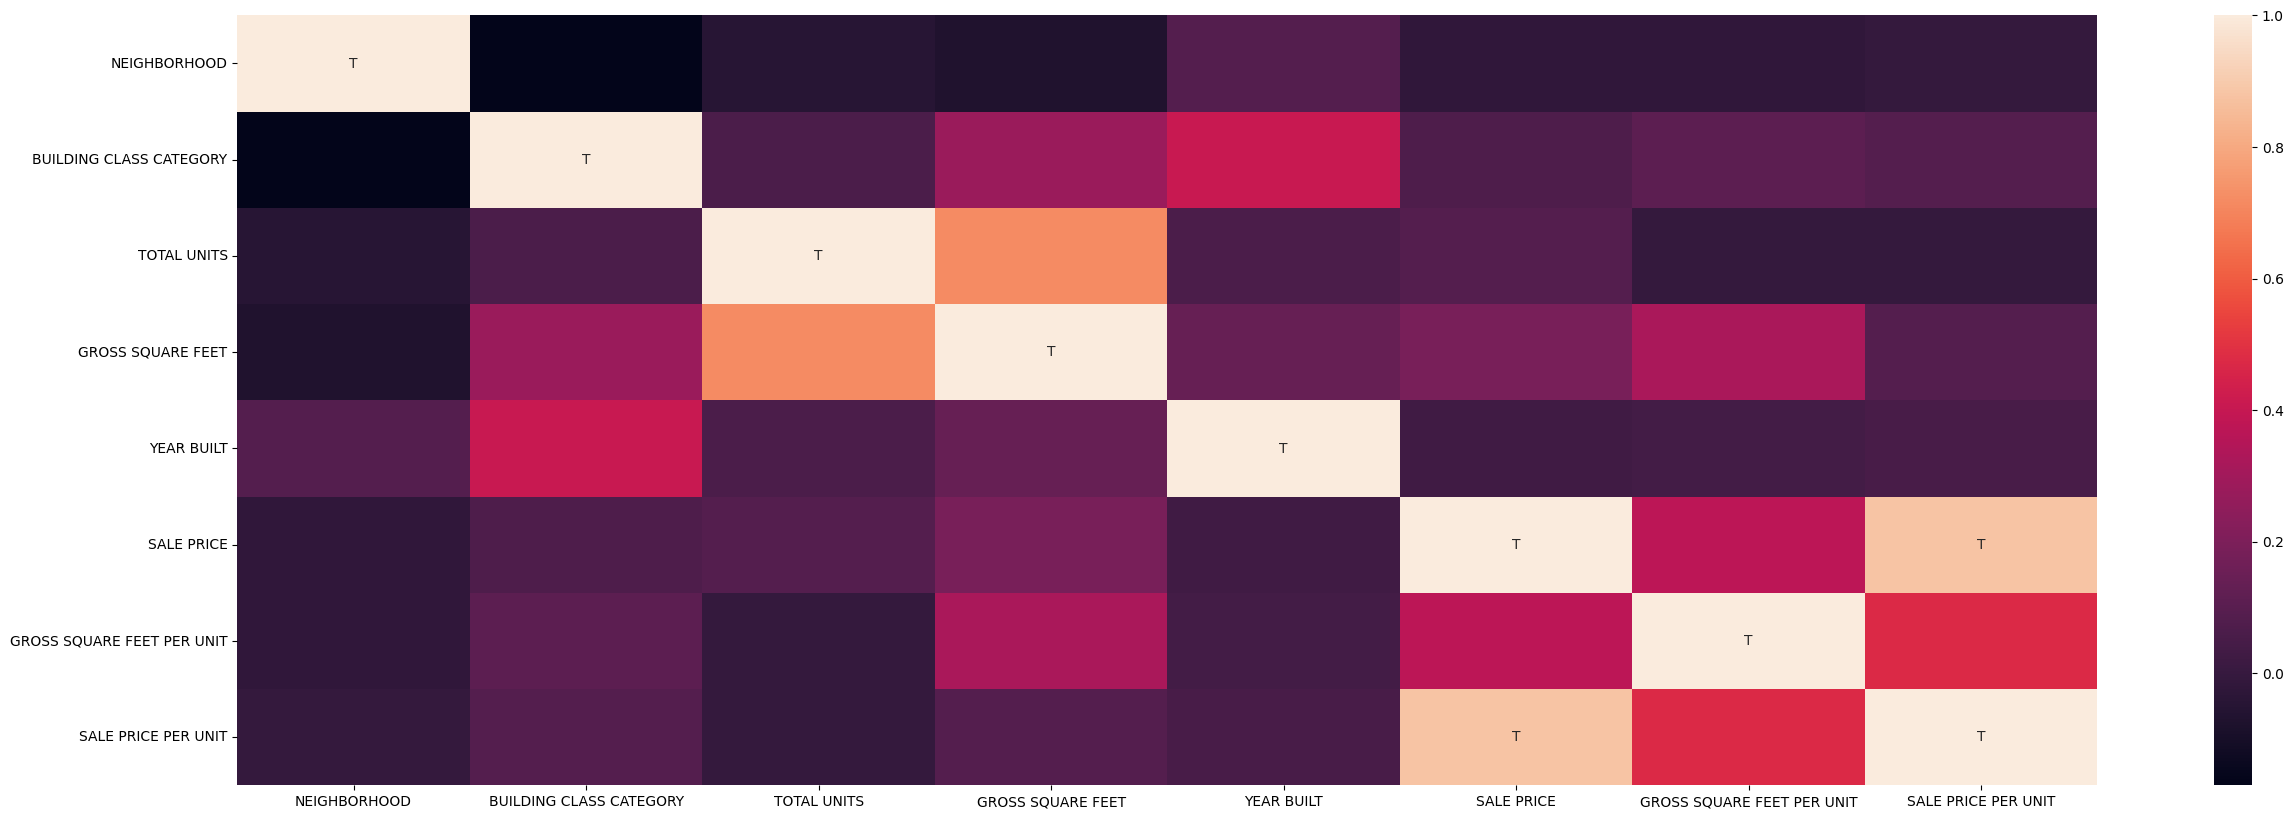

In [70]:
# Q5

df_q5 = df

df_raw_q5 = df_q5[['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TOTAL UNITS', 'GROSS SQUARE FEET', 'YEAR BUILT', 'SALE PRICE']]

unique_neighborhoods = df_raw_q5['NEIGHBORHOOD'].unique()
neighborhood_mapping = {neighborhood: i + 1 for i, neighborhood in enumerate(unique_neighborhoods)}
df_raw_q5['NEIGHBORHOOD'] = df_raw_q5['NEIGHBORHOOD'].map(neighborhood_mapping)

unique_bcc = df_raw_q5['BUILDING CLASS CATEGORY'].unique()
bcc_mapping = {bcc: i + 1 for i, bcc in enumerate(unique_bcc)}
df_raw_q5['BUILDING CLASS CATEGORY'] = df_raw_q5['BUILDING CLASS CATEGORY'].map(bcc_mapping)

df_raw_q5 = df_raw_q5[df_raw_q5['SALE PRICE'] > 1]

df_eng = df_raw_q5

df_eng['GROSS SQUARE FEET PER UNIT'] = df_eng['GROSS SQUARE FEET'] / df_eng['TOTAL UNITS']
df_eng['SALE PRICE PER UNIT'] = df_eng['SALE PRICE'] / df_eng['TOTAL UNITS']

# Plotting taken from tutorial:
fig, ax = plt.subplots(figsize=(20, 10))
corr = df_eng.corr()[['SALE PRICE']]
sns.heatmap(corr, annot=True)

fig, ax = plt.subplots(figsize=(30, 10))
cor_df = df_eng.corr(method = "pearson").round(2)
sns.heatmap(cor_df, ax=ax, annot=True)

annot_labels = np.empty_like(cor_df, dtype=str)
annot_mask = cor_df >= 0.8
annot_labels[annot_mask] = 'T' 

fig, ax = plt.subplots(figsize=(30, 10))
sns.heatmap(cor_df, annot=annot_labels, fmt='')

## Q6

LinearRegression()
RMSE train: 5794628.321897367
RMSE test : 4235053.115116877


/var/folders/yc/z5nb9w3s5_51k4zty9gsbrvm0000gn/T/ipykernel_21877/1973948366.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw_feat['NEIGHBORHOOD'] = df_raw_feat['NEIGHBORHOOD'].map(neighborhood_mapping)
/var/folders/yc/z5nb9w3s5_51k4zty9gsbrvm0000gn/T/ipykernel_21877/1973948366.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw_feat['BUILDING CLASS CATEGORY'] = df_raw_feat['BUILDING CLASS CATEGORY'].map(bcc_mapping)


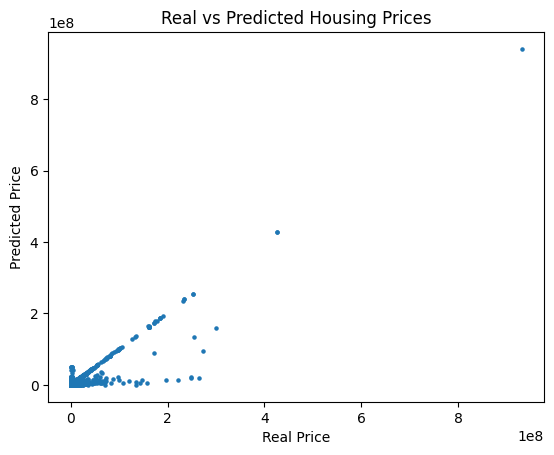

Ridge(alpha=20.0)
RMSE train: 5794628.321897373
RMSE test : 4235053.13101359


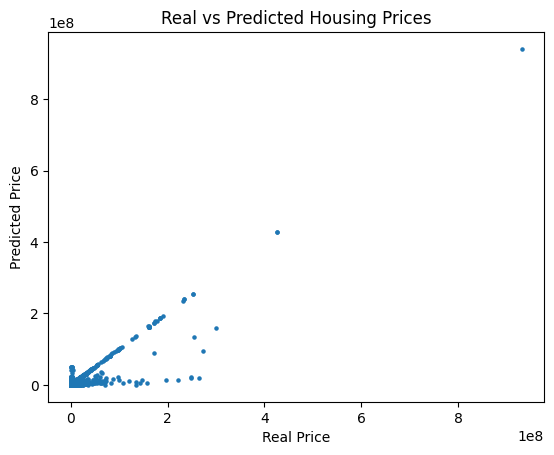

In [71]:
# Q6

df_q6 = df

df_raw_feat = df_q6[['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TOTAL UNITS', 'GROSS SQUARE FEET', 'YEAR BUILT', 'SALE PRICE']]

unique_neighborhoods = df_raw_feat['NEIGHBORHOOD'].unique()
neighborhood_mapping = {neighborhood: i + 1 for i, neighborhood in enumerate(unique_neighborhoods)}
df_raw_feat['NEIGHBORHOOD'] = df_raw_feat['NEIGHBORHOOD'].map(neighborhood_mapping)

unique_bcc = df_raw_feat['BUILDING CLASS CATEGORY'].unique()
bcc_mapping = {bcc: i + 1 for i, bcc in enumerate(unique_bcc)}
df_raw_feat['BUILDING CLASS CATEGORY'] = df_raw_feat['BUILDING CLASS CATEGORY'].map(bcc_mapping)

df_raw_feat = df_raw_feat[df_raw_feat['SALE PRICE'] > 1]

df_eng_feat = df_raw_feat

df_eng_feat['GROSS SQUARE FEET PER UNIT'] = df_eng_feat['GROSS SQUARE FEET'] / df_eng_feat['TOTAL UNITS']
df_eng_feat['SALE PRICE PER UNIT'] = df_eng_feat['SALE PRICE'] / df_eng_feat['TOTAL UNITS']

if df_eng_feat.isnull().values.any():
    df_eng_feat = df_eng_feat.fillna(0)

df_eng_feat = df_eng_feat[np.isfinite(df_eng_feat).all(1)]

# The following code as been taken from the tutorial:
train, test = train_test_split(df_eng_feat, test_size=0.2, shuffle=True, random_state=123)

y_train = train['SALE PRICE']
y_test = test['SALE PRICE']
X_train = train.drop(['SALE PRICE'], axis=1)
X_test  = test.drop(['SALE PRICE'], axis=1)

def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))


def train_test(model):
    print(model)
    model.fit(X_train.values, y_train.values)
    print("RMSE train: {}".format(rmse(y_train.values, model.predict(X_train.values))))
    print("RMSE test : {}".format(rmse(y_test.values,  model.predict(X_test.values))))

    plt.scatter(y_test, model.predict(X_test.values), s=5 )
    plt.xlabel('Real Price')
    plt.ylabel('Predicted Price')
    plt.title( "Real vs Predicted Housing Prices")
    plt.show()


model_A = linear_model.LinearRegression()

lambda_list_ridge = list(np.linspace(20, 25, 101))
model_B = Ridge(alpha=lambda_list_ridge[0])

train_test(model_A)
train_test(model_B)



Please note: I should have probably done some feature scalling to make things look better.